In [55]:
!pip install pandas xlrd
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install pandas openpyxl

import pandas as pd
import seaborn as sns
import numpy as np
import re
from fuzzywuzzy import process

In [56]:
df = pd.read_excel("GSAF5.xlsx")  # Downloading dataset via xls file
df   

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


### Initial examination of dataset

In [58]:
df   # First impression of the dataset

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6987,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,NaN,"H. Taunton; N. Bartlett, p. 234",ND-0005-RoebuckBay.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN
6988,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,NaN,"H. Taunton; N. Bartlett, pp. 233-234",ND-0004-Ahmun.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN
6989,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,NaN,"F. Schwartz, p.23; C. Creswell, GSAF",ND-0003-Ocracoke_1900-1905.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN
6990,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,NaN,"The Sun, 10/20/1938",ND-0002-JulesPatterson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN


In [59]:
df.shape    # Viewing the columns & rows of the dataset

(6992, 23)

In [60]:
df.describe()   # Gaining information about the count, mean, min, max & standard deviation (only for numerical columns)

,Year,original order
count,6990.000000,6799.000000
mean,1935.018598,3401.152081
std,272.082794,1963.076319
min,0.000000,2.000000
25%,1947.000000,1701.500000
50%,1986.000000,3401.000000
75%,2009.000000,5100.500000
max,2026.000000,6802.000000


In [61]:
df.nunique()    # Getting unique values within the dataset

Date              6040
Year               261
Type                12
Country            239
State              920
Location          4553
Activity          1598
Name              5726
Sex                  8
Age                246
Injury            4121
Fatal Y/N           12
Time               434
Species           1706
Source            5345
pdf               6789
href formula      6784
href              6776
Case Number       6777
Case Number.1     6775
original order    6797
Unnamed: 21          1
Unnamed: 22          2
dtype: int64

In [62]:
df.dtypes # Checking the data types of each column

Date               object
Year              float64
Type               object
Country            object
State              object
Location           object
Activity           object
Name               object
Sex                object
Age                object
Injury             object
Fatal Y/N          object
Time               object
Species            object
Source             object
pdf                object
href formula       object
href               object
Case Number        object
Case Number.1      object
original order    float64
Unnamed: 21        object
Unnamed: 22        object
dtype: object

In [63]:
df.isna().sum() # Checking for missing values

Date                 0
Year                 2
Type                18
Country             50
State              482
Location           565
Activity           585
Name               219
Sex                579
Age               2994
Injury              35
Fatal Y/N          561
Time              3526
Species           3132
Source              19
pdf                193
href formula       198
href               196
Case Number        194
Case Number.1      195
original order     193
Unnamed: 21       6991
Unnamed: 22       6990
dtype: int64

### Dealing with column names & dropping irrelevant ones

In [65]:
df.columns = df.columns.str.lower().str.replace(' ', '_')   #Changing the column names to be lower case & an "_" instead of a space.

df.rename(columns = {'species_' : 'species'}, inplace = True) # Fixing species column that had a space at the end

In [66]:
# Deleted unnecessary columns from the dataset: (We deemed them unnecessary due to our hypothesis or because they were mostly null)
df.drop(columns = ['unnamed:_21', 'unnamed:_22', 'year', 'pdf', 'href_formula', 'href', 'case_number', 'case_number.1', 'original_order'], inplace = True)


In [67]:
df.shape

(6992, 14)

In [68]:
df.dtypes # Noticed here age is a string so ammending it

df.age = pd.to_numeric(df.age, errors = 'coerce') # Converting column to numeric, adding in errors = coerce part to convert non numerical values to nulls and avoid an error.

df.dtypes # Confirming it worked

date          object
type          object
country       object
state         object
location      object
activity      object
name          object
sex           object
age          float64
injury        object
fatal_y/n     object
time          object
species       object
source        object
dtype: object

### Dealing with null values & duplicates

In [70]:
"""Cleaning up some unique values in some columns for improved accuracy"""

df.type = df.type.replace({' Provoked': 'Provoked', 'Questionable': np.nan,'Watercraft': 'Unprovoked', 'Sea Disaster': np.nan, '?': np.nan, 'Unconfirmed': np.nan, 'Unverified': np.nan, 'Invalid': np.nan, 'Boat': 'Unprovoked' })
print(df.type.unique()) # Leave 'provoked', 'unprovoked', 'under investigation'


df.sex = df.sex.replace({'lli': np.nan, '.': np.nan, 'N': np.nan, 'M ': 'M', ' M': 'M', 'M x 2': 'M'})
print(df.sex.unique()) # Leave 'M,' 'F'

df['fatal_y/n'] = df['fatal_y/n'].replace({'F': 'Y', 'M': np.nan, 'n': 'N', 'Nq': 'N',
                             'UNKNOWN': np.nan, 2017: np.nan, 'Y x 2': 'Y',
                             ' N': 'N', 'N ': 'N', 'y': 'Y'}) # Leave 'Y', 'N'
df['fatal_y/n'].unique()

df.country.unique() # Noticing quite a few countries with a "?" at the end so i'll remove them

df.country = df.country.str.rstrip("?") # Using strip to remove those with a ? and keep the rest.

df.species = df.species.str.lower()
df.species = df.species.str.strip()
  # remove all capital letters and trailing spaces

df.species.nunique()

['Unprovoked' 'Provoked' nan 'Under investigation']
['M' 'F' nan]


1593

In [71]:
df = df.dropna(subset=['fatal_y/n', 'type'], how='all') # Dropping rows with fatal & type that are null as they don't add value to Hypothesis 1
df = df.dropna(subset=['fatal_y/n', 'species'], how='all')  # Dropping rows with fatal & species that are null as they don't add value to Hypothesis 2
df = df.dropna(subset=['name', 'sex'], how='all') # Dropping 70 rows that had both name & sex null so we can fill them in later on.

In [72]:
# Using regex to fix data column format:

df["date"] = df["date"].apply(lambda x: re.findall(r"\b(?:\d{4}-\d{2}-\d{2}|\d{2}-[A-Za-z]{3}-\d{4})\b", str(x))[0] if len(re.findall(r"\b(?:\d{4}-\d{2}-\d{2}|\d{2}-[A-Za-z]{3}-\d{4})\b", str(x))) > 0 else np.NaN)

df.date.isna().sum()  # Now created 853 nulls due to adjusting the format

df.date.fillna('Unverified', inplace = True)  # Filling nulls with unverified as we don't want to lose 853 rows in our data.

C:\Users\umehc\AppData\Local\Temp\ipykernel_30620\2007299746.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.date.fillna('Unverified', inplace = True)  # Filling nulls with unverified as we don't want to lose 853 rows in our data.


In [73]:
# Filling in null names with John or Jane Doe, as a better way to display the data than marking unknown.

df.loc[(df.sex == "M") & (df.name.isna()), 'name'] = 'John Doe'
df.loc[(df.sex == "F") & (df.name.isna()), 'name'] = 'Jane Doe'

df.loc[df.name.isin(['John Doe', 'Jane Doe'])]  # Checking that it worked.

,date,type,country,state,location,activity,name,sex,age,injury,fatal_y/n,time,species,source
223,01-Jun-2022,Unprovoked,AUSTRALIA,Western Australia,Oyster Stacks near Exmouth12h15,Swimming,Jane Doe,F,NaN,Minor injury,N,12h15,NaN,"Perth Now, 6//2/2022"
480,12-Dec-2019,NaN,REUNION ISLAND,NaN,NaN,Kayaking,John Doe,M,70.0,Partial remains recovered 12/26/2019 from shark,Y,NaN,3.4 m tiger shark,"Clicanoo, 12/27/2019"
846,13-Jan-2017,Unprovoked,AUSTRALIA,Queensland,Clairview,Swimming,John Doe,M,57.0,Injury to hand,N,13h30,NaN,"Brisbane Times,1/13/2017"
1528,17-Sep-2011,Unprovoked,KENYA,Coast Province,"Mama Ngina Beach, Mombasa",Swimming,John Doe,M,17.0,FATAL,Y,NaN,NaN,"Mombasa411, 9/20/2011"
1853,09-Nov-2008,Unprovoked,AUSTRALIA,South Australia,North Haven,Fishing,John Doe,M,NaN,"No injury to occupant, shark bit dinghy & motor",N,NaN,bronze whaler shark,"C. Johansson, GSAF"
1865,14-Sep-2008,Unprovoked,USA,Florida,"Ormond-by-the-Sea, Volusia County",Swimming,John Doe,M,32.0,Lacerations to foot,N,12h00,2' to 3' juvenile shark,S. Petersohn
1954,Unverified,Provoked,JAPAN,Tokyo Bay,NaN,Diving,John Doe,M,NaN,"No injury, captive shark attempted to bite div...",NaN,NaN,"goblin shark, 4.2'",L Compagno
1983,30-Sep-2007,NaN,PHILIPPINES,Palawan,Off Cagayancillo,"The 426-ton cargo ship Mia, laden with cement,...",John Doe,M,NaN,FATAL Only 4 of the 18 on board were re...,Y,14h40,NaN,"Cebu Daily News, 10/3/2007"
1989,22-Sep-2007,Unprovoked,USA,Florida,Huguenot Park,Surfing,Jane Doe,F,NaN,Laceration to foot,N,NaN,4' shark,"R.Duffy, First Coast News. 9/23/2007"
2566,13-Sep-2001,Provoked,UNITED KINGDOM,Cheshire,"Blue Planet Aquarium, Ellesmere Port",Diving,John Doe,M,NaN,Head bitten by captive shark PROVOKED INCIDENT,N,NaN,12' sandtiger shark,"Daily Post, 9/14/2001"


In [74]:
""" Filling in remaining nulls in the columns. Some we replaced with just unknowns as its not very relevant to our hypothesis and others we used aggregation to fill."""

df.dropna(subset = ['type'], inplace = True) # Dropping all rows with type as null to not mess with Hypothesis 1
df.country.fillna('Unknown', inplace = True)   # Only 50 null countries so marking unknown.
df.state.fillna('Not Confirmed', inplace = True)  # Marking the state nulls as not confirmed as they are also irrelevant to our hypothesis
df.location.fillna('Unknown', inplace = True) # Marking location nulls as unknown to not contaminate dataset.
df.activity.fillna('Unknown', inplace = True) # Marking missing activities as unknown.
df.sex = df.sex.fillna(df.sex.mode()[0])  # Filling in the null sex values with the mode, shouldn't impact our hypothesis at all.
df.age = df.age.fillna(df.age.mean()) # Filling in the null age values with the mean, to not affect the data too much or affect our hypothesis.
df.injury.fillna('Not Specified', inplace = True) # Filling in only a handfull of null injuries with not specified
df.dropna(subset = ['fatal_y/n'], inplace = True) # Dropping only 29 rows with fatality as null because it is very important for both of our hypothesis.
df.time.fillna('Not Specified', inplace = True)   # Filling in the time null values with unknowns as there are over 2807 null rows and we can't lose that much of our data.
df.source.fillna('Unconfirmed', inplace = True) # Filling in the nulls of source with unconfirmed as it is not very relevant to our hypothesis.

C:\Users\umehc\AppData\Local\Temp\ipykernel_30620\4040191920.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.country.fillna('Unknown', inplace = True)   # Only 50 null countries so marking unknown.
C:\Users\umehc\AppData\Local\Temp\ipykernel_30620\4040191920.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [75]:
df.isna().sum() # We will clean species once we start hypothesis 2, we don't want to lose 2776 rows for hypothesis 1

date            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
age             0
injury          0
fatal_y/n       0
time            0
species      2776
source          0
dtype: int64

In [76]:
df.duplicated().sum() # Found there are 2 duplicate rows
df.drop_duplicates(inplace = True)  # Dropping both rows as they are irrelevant
df.duplicated().sum() # Checking its 0

0

### Hypothesis 1: Provoked shark attacks are more fatal than unprovoked attacks.

In [78]:
# Hypothesis 1: Provoked shark attacks are more deadly than unprovoked

df_hypothesis_1 = df[['name','sex','type','fatal_y/n']] # Created new data frame specific to hypothesis 1 with only relevant columns for us.

In [79]:
# Checking for remaining null values in type & fatal

print("Remaining Null Values in 'type' column:", df_hypothesis_1['type'].isna().sum())
print("Remaining Null Values in 'fatal_y/n' column:", df_hypothesis_1['fatal_y/n'].isna().sum())

Remaining Null Values in 'type' column: 0
Remaining Null Values in 'fatal_y/n' column: 0


In [80]:
df_hypothesis_1 = df_hypothesis_1.reset_index(drop=True)    # Resetting index after dropping values.

df_hypothesis_1

,name,sex,type,fatal_y/n
0,Boy,M,Unprovoked,N
1,Dale Kittow,M,Unprovoked,N
2,Male not stated was a dive tour worker,M,Provoked,N
3,Robert Cuewapuru,M,Unprovoked,Y
4,Lance Appleby,M,Unprovoked,Y
...,...,...,...,...
5990,male,M,Unprovoked,Y
5991,Ahmun,M,Unprovoked,Y
5992,Coast Guard personnel,M,Unprovoked,Y
5993,Jules Patterson,M,Unprovoked,Y


In [81]:
grouped_hypothesis_1 = df_hypothesis_1.groupby(['type', 'fatal_y/n']).size().unstack(fill_value=0)  # Grouping by type & fatal result to see our results.

grouped_hypothesis_1['fatality_rate'] = round(grouped_hypothesis_1['Y'] / (grouped_hypothesis_1['Y'] + grouped_hypothesis_1['N']) * 100, 2).astype(str) + '%'   # Adding in a column for fatality rate to test our theory.

grouped_hypothesis_1  # Seeing final result --> Hypothesis 1 is wrong in the end.

fatal_y/n,N,Y,fatality_rate
type,,,
Provoked,605,21,3.35%
Under investigation,1,0,0.0%
Unprovoked,4123,1245,23.19%


<Axes: title={'center': 'Fatality Rate by Attack Type'}, xlabel='Attack Type', ylabel='Fatality Rate (%)'>

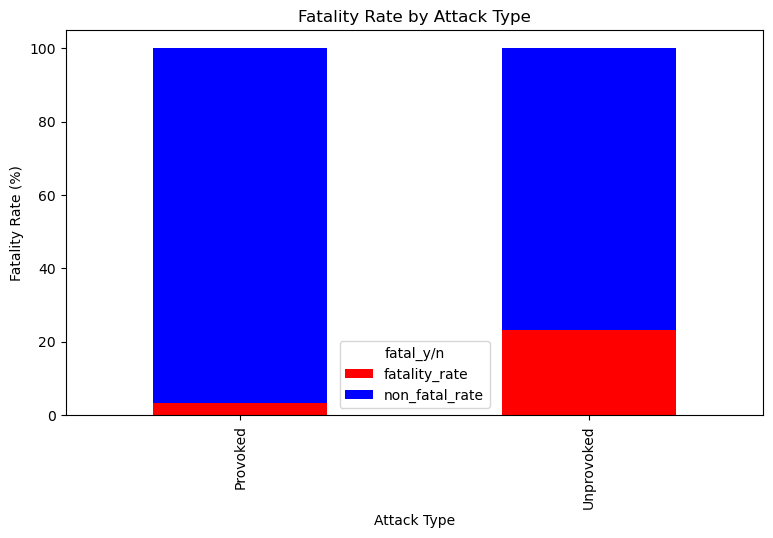

In [82]:
"""Visualising data using a bar chart"""

# Create a new DataFrame to visualise by copying grouped_hypothesis_1 to make some changes to it without altering original.
visual_hypothesis_1 = grouped_hypothesis_1.copy()

# Changing the fatality rate to a float and removing % sign to use for bar chart
visual_hypothesis_1['fatality_rate'] = visual_hypothesis_1['fatality_rate'].str.rstrip("%").astype(float)

# Excluding 'Under investigation' type to make the data more clean:
visual_hypothesis_1 = visual_hypothesis_1.drop(index='Under investigation')

# Calculating the inverse (non-fatal percentage) in order to make it a stacked bar chart.
visual_hypothesis_1['non_fatal_rate'] = 100 - visual_hypothesis_1['fatality_rate']

# Plotting stacked bar chart with fatality rate as the y axis & attack type is the x axis.
visual_hypothesis_1[['fatality_rate', 'non_fatal_rate']].plot(kind='bar', stacked=True, figsize=(9, 5), title="Fatality Rate by Attack Type", ylabel="Fatality Rate (%)", xlabel="Attack Type", color=['red', 'blue'])

### Hypothesis 2: Great whites are the most fatal

In [84]:
# Hypothesis 2: Great white are the deadliest shark species in terms of total fatalities

# Check out the species column. We see lots of unique values
print(df.species.value_counts())
print(df.species.nunique())

species
white shark                                                                                                                      184
tiger shark                                                                                                                       86
bull shark                                                                                                                        71
4' shark                                                                                                                          43
6' shark                                                                                                                          42
                                                                                                                                ... 
2.5 oceanic whitetip shark                                                                                                         1
tiger shark, 4 m [13']  ?                                    

In [85]:
# Create a baby dataframe to compare species and fatal_y/n

df2 = df[['species', 'fatal_y/n']]
df2

,species,fatal_y/n
0,not stated,N
1,bronze whaler,N
2,not stated,N
3,reportedly tiger or bull shark,Y
4,great white shart estimated 4.8m 16 ft,Y
...,...,...
6987,NaN,Y
6988,NaN,Y
6989,NaN,Y
6990,NaN,Y


In [86]:
print(df2.species.isna().sum()) # Check for nulls
df2 = df2.dropna() # Drop nulls
df2

2775


,species,fatal_y/n
0,not stated,N
1,bronze whaler,N
2,not stated,N
3,reportedly tiger or bull shark,Y
4,great white shart estimated 4.8m 16 ft,Y
...,...,...
6966,12' tiger shark,Y
6983,blue pointer,Y
6984,blue pointer,Y
6985,blue pointers,Y


In [87]:
# remove 'not stated' from species

df2 = df2[df2['species'] != 'not stated']
df2.reset_index(drop=True, inplace=True) # Reset index
df2 # 6 rows removed

,species,fatal_y/n
0,bronze whaler,N
1,reportedly tiger or bull shark,Y
2,great white shart estimated 4.8m 16 ft,Y
3,reportedly a tiger shark,N
4,reportedly a tiger shark,Y
...,...,...
3209,12' tiger shark,Y
3210,blue pointer,Y
3211,blue pointer,Y
3212,blue pointers,Y


In [88]:
# To further clean up the column, we will use fuzzy matching and exact matching.

# First, create a list of valid species names.

# Found a list of 35 species known to have been involved in shark attacks online
# (https://www.floridamuseum.ufl.edu/shark-attacks/factors/species-implicated/).

valid_species = ['grey reef', 'bronze whaler', 'spinner', 'silky', 'galapagos', 'bull', 'blacktip',
'oceanic whitetip', 'blacktip reef', 'dusky', 'caribbean reef', 'sandbar', 'requiem', 'sand tiger',
'white', 'tiger', 'tope', 'nurse', 'port jackson', 'cookiecutter', 'shortfin mako', 'mako', 'porbeagle',
'lemon', 'sevengill', 'spotted wobbegong', 'ornate wobbegong', 'wobbegong', 'blue', 'guitarfish',
'hammerhead', 'whitetip reef', 'atlantic angel', 'leopard'] # Removed 'shark' to help with fuzzy matching (everything would match with 'shark')

# Then, we fuzzy match

# Create fuzzy matching function
def fuzzy_match_for_species(species_name):
    if species_name is not None:  # If the species name is not None (not NaN)
        best_match, score = process.extractOne(species_name, valid_species) # finds the value from valid_species most similar to the given string
        if score >= 80:  # Fuzzy match with threshold of 80
            return best_match
    return species_name  # Return the original species name if no match

# Apply fuzzy matching to species column and add fuzzy match column
df2['fuzzy_match'] = df2['species'].apply(fuzzy_match_for_species)

df2

C:\Users\umehc\AppData\Local\Temp\ipykernel_30620\105375038.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['fuzzy_match'] = df2['species'].apply(fuzzy_match_for_species)


,species,fatal_y/n,fuzzy_match
0,bronze whaler,N,bronze whaler
1,reportedly tiger or bull shark,Y,bull
2,great white shart estimated 4.8m 16 ft,Y,white
3,reportedly a tiger shark,N,tiger
4,reportedly a tiger shark,Y,tiger
...,...,...,...
3209,12' tiger shark,Y,tiger
3210,blue pointer,Y,blue
3211,blue pointer,Y,blue
3212,blue pointers,Y,blue


In [89]:
df2.fuzzy_match.nunique() # Still plenty of unique values, but no longer 1500

584

In [90]:
# Now, find exact matches in the fuzzy_match column

# Create function

def check_exact_match(species):
    for valid_species_name in valid_species:
        if valid_species_name in species:  # Check if the valid species name is in the string
            return valid_species_name
    return None  # Return None if no exact match found

# Step 4: Apply exact match check to fuzzy matches
df2['match'] = df2['fuzzy_match'].apply(check_exact_match)

df2



C:\Users\umehc\AppData\Local\Temp\ipykernel_30620\2448625189.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['match'] = df2['fuzzy_match'].apply(check_exact_match)


,species,fatal_y/n,fuzzy_match,match
0,bronze whaler,N,bronze whaler,bronze whaler
1,reportedly tiger or bull shark,Y,bull,bull
2,great white shart estimated 4.8m 16 ft,Y,white,white
3,reportedly a tiger shark,N,tiger,tiger
4,reportedly a tiger shark,Y,tiger,tiger
...,...,...,...,...
3209,12' tiger shark,Y,tiger,tiger
3210,blue pointer,Y,blue,blue
3211,blue pointer,Y,blue,blue
3212,blue pointers,Y,blue,blue


In [91]:
df2.match.isna().sum() # No match found for 1230 values

1229

In [92]:
df2 = df2.dropna() # drop the nulls
df2 = df2.reset_index(drop=True)  # Reset the index
df2

,species,fatal_y/n,fuzzy_match,match
0,bronze whaler,N,bronze whaler,bronze whaler
1,reportedly tiger or bull shark,Y,bull,bull
2,great white shart estimated 4.8m 16 ft,Y,white,white
3,reportedly a tiger shark,N,tiger,tiger
4,reportedly a tiger shark,Y,tiger,tiger
...,...,...,...,...
1980,12' tiger shark,Y,tiger,tiger
1981,blue pointer,Y,blue,blue
1982,blue pointer,Y,blue,blue
1983,blue pointers,Y,blue,blue


In [93]:
# Now to figure out which species have the most fatalities!

fatalities_per_species = df2.groupby('match')['fatal_y/n'].apply(lambda x: (x == 'Y').sum())
fatalities_per_species = fatalities_per_species[fatalities_per_species > 0] # exclude non-fatal species
# Sort the species by the count of 'Y' (fatalities), from high to low
fatalities_per_species = fatalities_per_species.sort_values(ascending=False)
fatalities_per_species

match
white               160
tiger                70
bull                 40
blue                 10
bronze whaler         8
oceanic whitetip      5
sand tiger            4
hammerhead            3
mako                  3
galapagos             1
nurse                 1
Name: fatal_y/n, dtype: int64

<class 'pandas.core.series.Series'>


<Axes: title={'center': 'Fatal attacks per species'}, ylabel='match'>

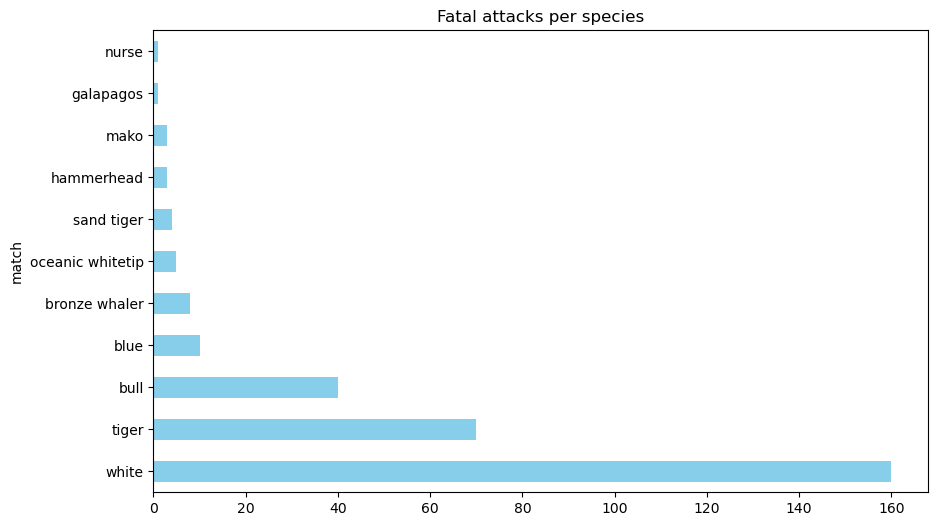

In [94]:
# Bar chart for the 11 fatal species
print(type(fatalities_per_species))
# fatalities_per_species = fatalities_per_species[fatalities_per_species['fatal_y/n']!= 0]

fatalities_per_species.plot(kind='barh', x='match', y='fatal_y/n', title='Fatal attacks per species', figsize=(10, 6), color='skyblue')

